# import library yang digunakan 

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings

import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [10]:
df = pd.read_csv("vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# cleaning data

In [11]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df['Year'] = SimpleImputer(strategy='mean').fit_transform(df[['Year']])
df['Publisher'] =SimpleImputer(strategy='most_frequent').fit_transform(df[['Publisher']])

df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

# Gunakan salah satu tipe pendekatan pada Supervised Learning.
## Klasifikasi

### buat data split 

In [16]:
data  = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
label = df['Genre']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

# Decicion Tree

In [17]:
clf = DecisionTreeClassifier()
model = clf.fit(data_train, label_train)

DecisionTreeClassifier()

DecisionTreeClassifier()

In [18]:
model_pred = model.predict(data_test)
acc_model = accuracy_score(label_test, model_pred)
print("Akurasi algoritma Decision Tree :", round(acc_model,3))

Akurasi algoritma Decision Tree : 0.187


# KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(data_train,label_train)

knn_pred = knn.predict(data_test)
acc_knn = accuracy_score(label_test, knn_pred)
print("Akurasi algoritma KNN  :", round(acc_knn,3))

Akurasi algoritma KNN  : 0.188


# Tampilkan score dari model-model tersebut untuk classification

## tampilkan knn

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


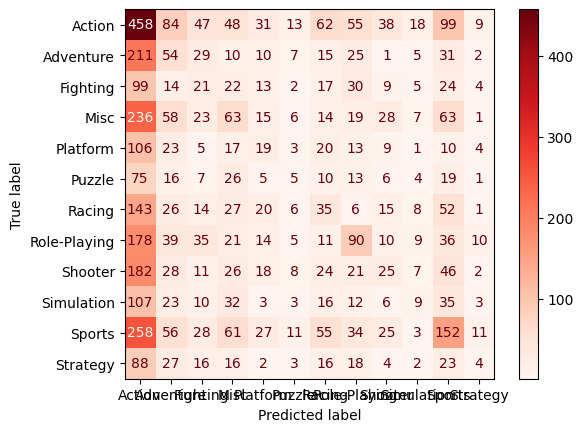

In [20]:
plot_confusion_matrix(knn, data_test, label_test, cmap='Reds')

## tampilkan decicion tree

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


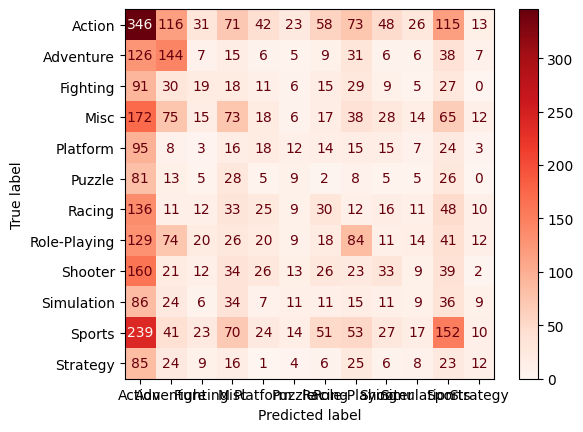

In [21]:
plot_confusion_matrix(clf, data_test, label_test, cmap='Reds')